### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
data=load_digits()

In [3]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
print('Image Data Shape',data.data.shape)
print('Label Data Shape',data.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Data Visualization

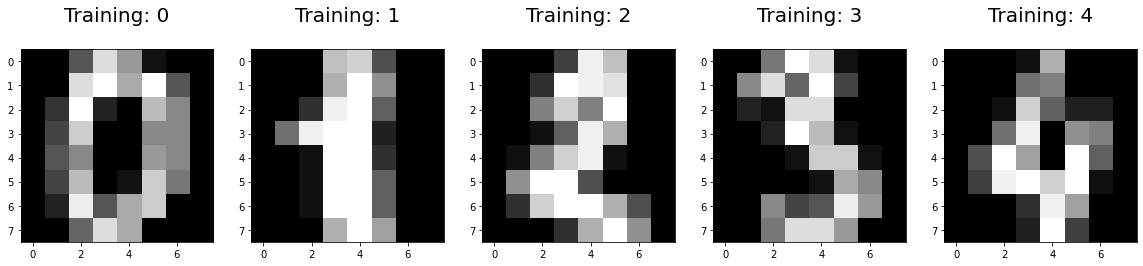

In [5]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(data.data[0:5],data.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label,fontsize=20)

### Splitting the data into Trainig and Testing data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.30,random_state=2)

In [7]:
x_train,x_test,y_train,y_test

(array([[ 0.,  0.,  0., ..., 16.,  5.,  0.],
        [ 0.,  0.,  9., ...,  1.,  0.,  0.],
        [ 0.,  0.,  5., ..., 16., 14.,  3.],
        ...,
        [ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  6., ..., 16., 16., 12.],
        [ 0.,  3., 14., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ..., 15.,  1.,  0.],
        [ 0.,  0.,  8., ..., 13.,  2.,  0.],
        ...,
        [ 0.,  0.,  5., ...,  2.,  0.,  0.],
        [ 0.,  2.,  8., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([6, 0, 2, ..., 1, 1, 5]),
 array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6,
        4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
        9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7,
        3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
        6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
        4, 7, 0, 3, 5, 8, 5

In [8]:
print(x_train.shape)

(1257, 64)


In [9]:
print(y_train.shape)

(1257,)


In [10]:
print(x_test.shape)

(540, 64)


In [11]:
print(y_test.shape)

(540,)


### Let's fit the Logistic Regression model to a Training data

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [14]:
# First let's predict our model for one observation
print(model.predict(x_test[0].reshape(1,-1)))     # We just done the reshaping for creating one dimensional array

[4]


In [15]:
# Let's predict our model for 10 observations
print(model.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [16]:
y_pred=model.predict(x_test)
y_pred

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 9, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 9,
       3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 8, 2, 7, 3, 0, 2, 1, 9,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 5, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

### Let's check how our model is fit to the test data by looking at the confusion matrix and accuracy score

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
acc=accuracy_score(y_test,y_pred)
acc

0.9537037037037037

In [19]:
score=model.score(x_test,y_test)

In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 40]], dtype=int64)

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score:0.9537037037037037')

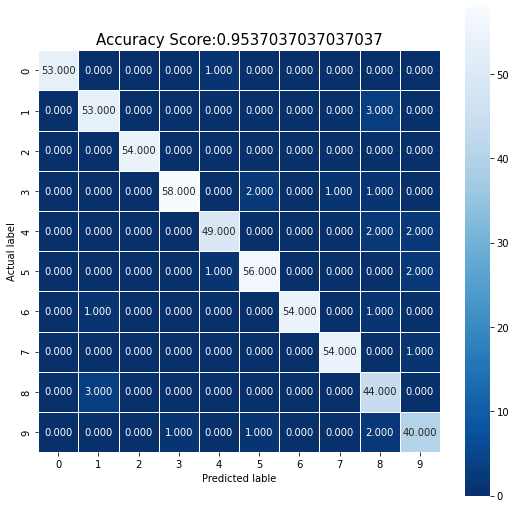

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted lable')
plt.ylabel('Actual label')
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15)